### 간단한 인공신경망 만들기

In [10]:
from torchviz import make_dot
import torch


Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[-0.5061]], requires_grad=True)
Parameter containing:
tensor([-0.8423], requires_grad=True)
tensor([-1.3484], grad_fn=<ViewBackward0>)
tensor([-1.3484], grad_fn=<AddBackward0>)


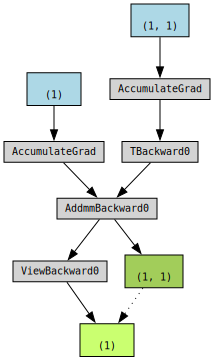

In [11]:
from torch import nn

x = torch.tensor([1.])
model = nn.Linear(1, 1) # 입력 node 한개, 출력 node 한 개인 layer를 만듦
print(model)

print(model.weight)
print(model.bias)

y = model(x)
print(y)

y2 = x @ model.weight + model.bias
print(y2)

make_dot(y)


Parameter containing:
tensor([[-0.2530],
        [ 0.2583],
        [-0.5033]], requires_grad=True)
Parameter containing:
tensor([ 0.1210, -0.7119, -0.8493], requires_grad=True)
Parameter containing:
tensor([[-0.1569, -0.4994,  0.2816]], requires_grad=True)
Parameter containing:
tensor([-0.4603], requires_grad=True)
tensor([-0.1320, -0.4535, -1.3526], grad_fn=<ViewBackward0>)
tensor([-0.5939], grad_fn=<ViewBackward0>)
tensor([-0.5939], grad_fn=<AddBackward0>)


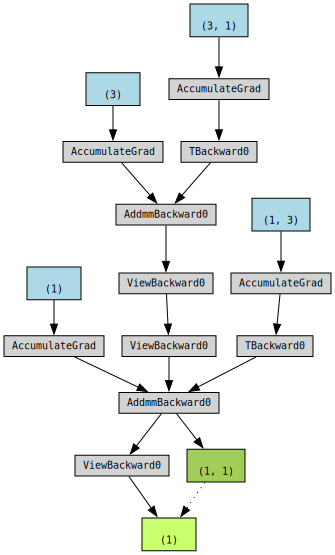

In [33]:
fc1 = nn.Linear(1, 3)
fc2 = nn.Linear(3, 1)

print(fc1.weight)
print(fc1.bias)
print(fc2.weight)
print(fc2.bias)

x = torch.tensor([1.])
x = fc1(x)
print(x)
y = fc2(x)
print(y)

x = torch.tensor([1.])
y2 = (x @ fc1.weight.T + fc1.bias) @ fc2.weight.T + fc2.bias
print(y2)

make_dot(y)

tensor([-1.3151, -1.0438])
tensor([-0.0315,  0.6798,  1.0480], grad_fn=<ViewBackward0>)


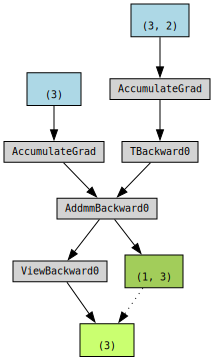

In [26]:
model  = nn.Linear(2, 3)
x = torch.randn(2)
print(x)
print(model(x))

make_dot(model(x))

In [27]:
model = nn.Linear(2, 3)

x = torch.randn(5, 2) # 개 x 채 => 두 개의 채널 값(키, 몸무게)를 가지는 데이터(사람) 5개

print(x)
print(model(x))

tensor([[-0.8406, -1.2950],
        [-0.4458, -1.8055],
        [ 0.3592, -0.9456],
        [-0.8396,  1.1243],
        [ 0.1372, -1.4561]])
tensor([[-0.2133,  0.4720, -0.0774],
        [ 0.1530,  0.3158, -0.0813],
        [ 0.3839,  0.2804,  0.2134],
        [-0.8694,  0.8320,  0.3082],
        [ 0.3944,  0.2495,  0.0886]], grad_fn=<AddmmBackward0>)


torch.Size([4, 5, 3])


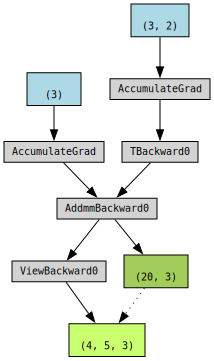

In [30]:
x = torch.randn(4, 5, 2)
print(model(x).shape)

make_dot(model(x))

tensor([0.8753, 0.3108, 1.2704], grad_fn=<ViewBackward0>)
tensor([0.0951], grad_fn=<ViewBackward0>)
tensor([0.0951], grad_fn=<ViewBackward0>)


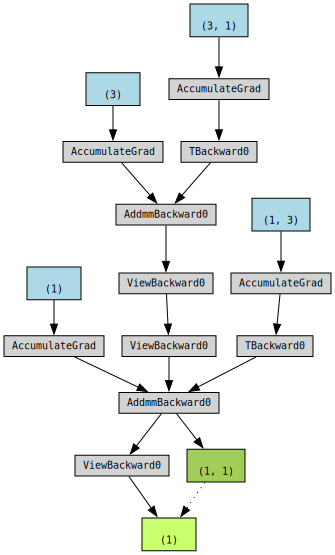

In [31]:
fc1 = nn.Linear(1, 3)
fc2 = nn.Linear(3, 1)

x = torch.tensor([1.])
x = fc1(x)
print(x)
x = fc2(x)
print(x)

model = nn.Sequential(fc1, fc2)
x = torch.tensor([1.])
print(model(x))

make_dot(model(x))

In [34]:
model = nn.Sequential(nn.Linear(2, 5),
                      nn.Linear(5, 10),
                      nn.Linear(10, 3))

x = torch.randn(5, 2)
print(x)
print(model(x))

tensor([[-0.2053,  1.4930],
        [-1.0000, -2.8439],
        [-0.7189, -0.0187],
        [-0.1893, -1.0458],
        [ 0.3194,  0.6182]])
tensor([[ 0.7948,  0.3877,  0.0604],
        [ 0.2508,  0.5827, -0.0508],
        [ 0.5784,  0.4449,  0.0570],
        [ 0.5308,  0.5237, -0.0766],
        [ 0.7626,  0.4582, -0.0644]], grad_fn=<AddmmBackward0>)


tensor([[0.3897, 0.5087, 0.6096],
        [0.3916, 0.5065, 0.6147],
        [0.3889, 0.5113, 0.6069],
        [0.3894, 0.5107, 0.6082],
        [0.3892, 0.5079, 0.6087]], grad_fn=<SigmoidBackward0>)


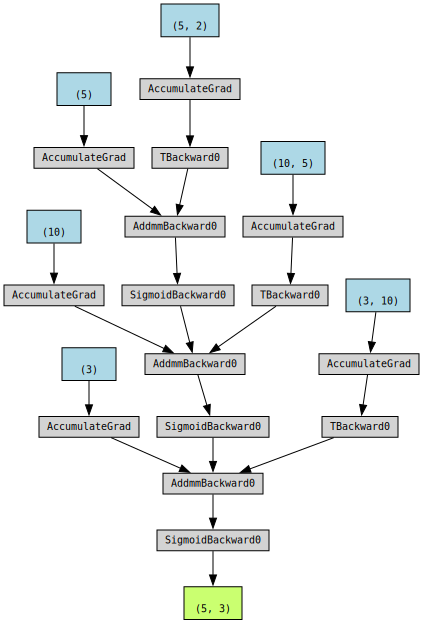

In [39]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(2, 5)
        self.fc2 = nn.Linear(5, 10)
        self.fc3 = nn.Linear(10, 3)
        self.act = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.act(x)
        x = self.fc3(x)
        x = self.act(x)
        return x

model = MyModel()
x = torch.randn(5, 2)
y = model(x) # model.forward(x) (nn.Module의 __call__에서 forward를 통과시킴)
print(y)

make_dot(y)

In [40]:
print(model)
print(model.fc1.weight)
print(model.fc2.bias)

MyModel(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
  (act): Sigmoid()
)
Parameter containing:
tensor([[-0.1223, -0.3465],
        [-0.4362, -0.3056],
        [ 0.6957, -0.4927],
        [-0.6785, -0.6148],
        [-0.4551,  0.3862]], requires_grad=True)
Parameter containing:
tensor([-0.1832, -0.1985, -0.2249, -0.0712,  0.3349,  0.2969, -0.0947, -0.1557,
        -0.3794, -0.3267], requires_grad=True)


tensor([[0.5020, 0.4532, 0.5649],
        [0.5021, 0.4534, 0.5660],
        [0.5020, 0.4535, 0.5671],
        [0.5025, 0.4534, 0.5638],
        [0.5018, 0.4531, 0.5645]], grad_fn=<SigmoidBackward0>)


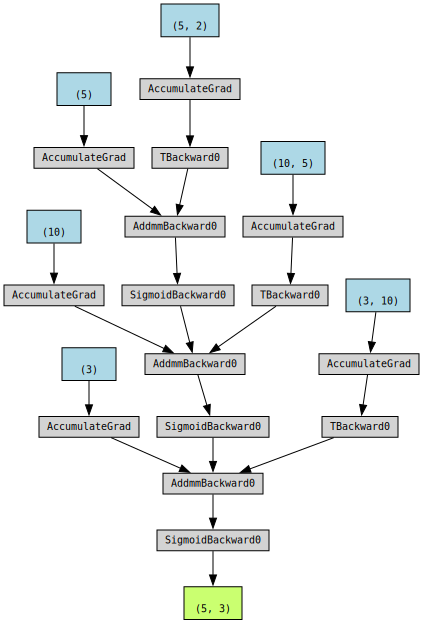

In [44]:
class MyModel2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear = nn.Sequential(nn.Linear(2,5),
                                    nn.Sigmoid(),
                                    nn.Linear(5, 10),
                                    nn.Sigmoid(),
                                    nn.Linear(10, 3),
                                    nn.Sigmoid())
        
    
    def forward(self, x):
        x = self.linear(x)
        return x
    

model2 = MyModel2()
x = torch.randn(5, 2)
y = model2(x)
print(y)

make_dot(y)

In [52]:
print(model2)
print(model2.linear[0].weight)
print(model2.linear[-2].bias)

MyModel2(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=3, bias=True)
    (5): Sigmoid()
  )
)
Parameter containing:
tensor([[ 0.1656, -0.4691],
        [ 0.1037,  0.4585],
        [ 0.3254,  0.6730],
        [ 0.3917, -0.4814],
        [ 0.3029, -0.2268]], requires_grad=True)
Parameter containing:
tensor([ 0.1180,  0.1343, -0.1192], requires_grad=True)


In [53]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1223, -0.3465],
         [-0.4362, -0.3056],
         [ 0.6957, -0.4927],
         [-0.6785, -0.6148],
         [-0.4551,  0.3862]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6154,  0.6369, -0.1374,  0.4646, -0.2884], requires_grad=True),
 Parameter containing:
 tensor([[-0.4037, -0.3765, -0.3597,  0.0545, -0.0944],
         [-0.2811,  0.2726, -0.1046, -0.3293,  0.0123],
         [ 0.3699,  0.0200,  0.3408, -0.0887,  0.2164],
         [-0.0993,  0.2820, -0.2113,  0.1533, -0.2912],
         [ 0.0425,  0.1763,  0.0066, -0.3209,  0.2643],
         [-0.2856, -0.1357, -0.0070, -0.3539,  0.2955],
         [ 0.0852,  0.2851,  0.4203,  0.0586, -0.4427],
         [-0.3213,  0.2717, -0.3139, -0.2608,  0.0248],
         [ 0.2976,  0.1278,  0.0651, -0.3725, -0.2669],
         [ 0.1750, -0.0986, -0.3825, -0.2636, -0.4077]], requires_grad=True),
 Parameter containing:
 tensor([-0.1832, -0.1985, -0.2249, -0.0712,  0.3349,  0.2969, -0.0947, -0.1557,
  

In [56]:
# 파라미터 수 구하기
num = sum([p.numel() for p in model.parameters() if p.requires_grad])
print(num)

108
